# Group15 project report

### Member Name: Amy Lechner, Sizhe Alley Wei, Dane Ethan, Han Qin.

In [2]:
install.packages("cowplot")
install.packages("kknn")
install.packages("themis")
install.packages("rsample")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘RANN’, ‘ROSE’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
library(tidyverse)
library(tidymodels)
library(repr)
library(scales)
library(cowplot)
library(themis)
library(rsample)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.2.0
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

### Introduction

Wine quality has become an important concept as wine connoisseurs are avid critics of quality of wines. The different aspects that contribute to wine quality are heavily researched topics and vintners do everything in their power to perfect these variables to create the highest quality wine possible. Portuguese “Vinho Verde” wine originated from the Northern region of Portugal and has since branched out to its own category of wine. The dataset draws its information from research on Vinho Verde wine, and was filed into two data sets, one focusing on red wine and the other on white. Our analysis is focused on the red subset. The purpose of our analysis is to be able to visualize characteristics of quality red wines and compare these characteristics with a red wine of known predictor values and unknown quality.


The goal is to be able to determine the quality of a wine based on the key characteristics provided by data that will be aggregated. The cataloged information can assist in the determination of quality characteristics based on the values provided for previous determined cases. We want to answer the question, what would be the quality of a wine of given observations (to be extracted from data of an existing wine brand) on a quality score of 3 to 8? We will be using a classification model which provides the ability to categorize an unknown as an integer quality score between the given parameters. 



The data that we are working with, Red Wine Quality, is a collection of eleven input variables pertaining to different components of wine as scientifically calculated values that were determined based on a series of physicochemical tests done by the data source. The output variable is a quality score on a scale of 3 to 8 that consists of integer values categorizing each wine based on their inputs. The data consist of input variables listed from greatest to least importance as sulphates, pH, total sulfur dioxide, alcohol, volatile acidity, free sulfur dioxide, fixed acidity, residual sugar, chlorides, density, and citric acid. The top three most important variables are defined as follows. Sulphates contribute to wine aroma and their presence arises in the fermentation process. Sulfates are measured in g(potassium sulphate)/dm^3. pH is given on a scale of 0 to 14. Wine should be acidic, regardless of its variety. Its deviation in this data varies from 2.7 to 4.0. Total sulfur dioxide encompasses the free sulfur dioxide in wine in addition to the sulfur dioxide that is chemically linked to other molecules within the wine, which prevents spoilage of the wine.

### Methods & Results:

In [4]:
wine <- read_csv('https://raw.githubusercontent.com/qinhan099/DSCI100_Group15_Spotify/main/winequality-red.csv')
any(is.na(wine))

Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (12): fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] FALSE

Method:

We use "any(is.na(wine))" to detect whether there exists a NA. in our dataset. The "False" outcome means our dataset doesn't have NA value.

In [5]:
t <- wine %>%
    mutate(quality = as.factor(quality))
head(t, n = 5)

fixed_acidity volatile_acidity citric_acid residual_sugar chlorides
1  7.4          0.70             0.00        1.9            0.076    
2  7.8          0.88             0.00        2.6            0.098    
3  7.8          0.76             0.04        2.3            0.092    
4 11.2          0.28             0.56        1.9            0.075    
5  7.4          0.70             0.00        1.9            0.076    
  free_sulfur_dioxide total_sulfur_dioxide density pH   sulphates alcohol
1 11                  34                   0.9978  3.51 0.56      9.4    
2 25                  67                   0.9968  3.20 0.68      9.8    
3 15                  54                   0.9970  3.26 0.65      9.8    
4 17                  60                   0.9980  3.16 0.58      9.8    
5 11                  34                   0.9978  3.51 0.56      9.4    
  quality
1 5      
2 5      
3 5      
4 6      
5 5

Method:

We need quality to class which we use to classification. So we need set it as factor.

In [6]:
set.seed(20)
wine_split <- initial_split(t, prop = 0.75, strata = quality)
wine_train <- training(wine_split)
wine_test <- testing(wine_split) 


Method:

We are splitting the data by the proportion of 0.75 and creating the training data for building model and testing data for verifying the classification model.   

Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


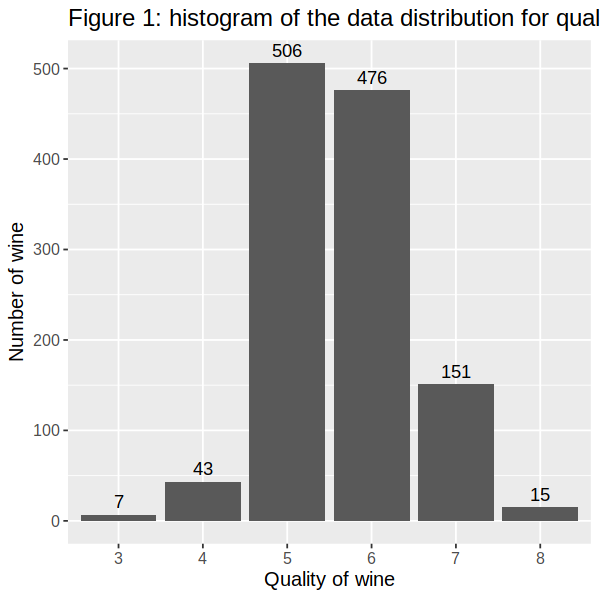

In [7]:
options(repr.plot.width=5, repr.plot.height=5)
quality_distribution <- group_by(wine_train, quality) |> summarize(count=n())

quality_plot <- ggplot(wine_train, aes(x=quality)) + 
    geom_histogram(stat="count") +
    geom_text(data=quality_distribution, aes(label=count, y=count), vjust=-0.5) +
    labs(x = "Quality of wine", y = "Number of wine") +
    theme(text = element_text(size = 12)) +
    ggtitle("Figure 1: histogram of the data distribution for quality.")

print(quality_plot)

This is a graphical representation of the distribution of wine quality in the training dataset. Most of quality for wine in the dataset are concentrated in the middle quality ratings (5 and 6), with 506 wines rated as quality 5 and 476 wines rated as quality 6. This suggests a normal or bell-shaped distribution but skewed slightly towards the lower quality ratings. There are fewer wines in the lowest (3 and 4) and highest (7 and 8) quality categories. 

This kind of distribution may cause some problems in later our model to predict. Because if our model choose to predict everything into quality 5 and 6. It still will give us model with high accuracy while the model is really bad at predict quality of 3,4,7,8. We will use up_sample to solve this unbalance data set problem.

In [8]:
columns_to_mean <- c("fixed_acidity", "volatile_acidity", "citric_acid", 
                     "residual_sugar", "chlorides", "free_sulfur_dioxide", 
                     "total_sulfur_dioxide", "density","pH","sulphates","alcohol")

mean_values <- wine_train %>%
  group_by(quality) %>%
  summarize(across(all_of(columns_to_mean), mean, .names = "mean_{.col}"))

mean_values

quality mean_fixed_acidity mean_volatile_acidity mean_citric_acid
1 3       8.257143           0.8950000             0.1500000       
2 4       7.883721           0.6791860             0.1711628       
3 5       8.161067           0.5742490             0.2426285       
4 6       8.402941           0.4931723             0.2802311       
5 7       8.930464           0.4084768             0.3806623       
6 8       8.313333           0.4226667             0.3820000       
  mean_residual_sugar mean_chlorides mean_free_sulfur_dioxide
1 2.671429            0.11242857     11.28571                
2 2.813953            0.09253488     13.16279                
3 2.560672            0.09279447     17.08696                
4 2.463655            0.08486765     15.48424                
5 2.710596            0.07523841     14.12252                
6 2.673333            0.06826667     12.80000                
  mean_total_sulfur_dioxide mean_density mean_pH  mean_sulphates mean_alcohol
1 22.71429                  0.9975043    3.397143 0.5828571      10.007143   
2 38.06977                  0.9966644    3.369070 0.6213953      10.258140   
3 56.53854                  0.9971140    3.307233 0.6231818       9.892885   
4 40.51891                  0.9966735    3.316513 0.6766807      10.629622   
5 34.20530                  0.9961105    3.287152 0.7442384      11.555740   
6 34.13333                  0.9950887    3.284000 0.7713333      12.180000

This table performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis by showing the mean value of each column. We can have  overview for each variable.

For mean_fixed_acidity, mean_residual_sugar, mean_density and mean_pH, every quality seems to have very similar value, and there is no clear trend across the qualities.


For mean_volatile_acidity and mean_chlorides the value are decreasing with the quality increasing.


For mean_citric_acid, mean_sulphates and mean_alcohol the values are nearly trending upwards with the quality increasing.

For mean_free_sulfur_dioxide, the values first go up and then go downwards as the quality increase.


For mean_total_sulfur_dioxide, the values change numerical changes are relatively large compared to other variables. The trend is nearly to be the same as mean_free_sulfur_dioxide.

In [9]:
plot_volatile_acidity <- ggplot(wine_train, aes(y=volatile_acidity, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="volatile acidity")+
    ggtitle("Figure 2: Box plot of volatile acidity versus quality.")

In [10]:
plot_fixed_acidity <- ggplot(wine_train, aes(y=fixed_acidity, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="fixed acidity")+
    ggtitle("Figure 3: Box plot of fixed acidity versus quality.")

In [11]:
plot_citric_acid <- ggplot(wine_train, aes(y=citric_acid, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="citric acid")+
    ggtitle("Figure 4: Box plot of citric acid versus quality.")

In [12]:
plot_residual_sugar <- ggplot(wine_train, aes(y=residual_sugar, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="residual sugar")+
    ggtitle("Figure 5: Box plot of residual sugar versus quality.")

In [13]:
plot_chlorides <- ggplot(wine_train, aes(y=chlorides, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="chlorides")+
    ggtitle("Figure 6: Box plot of chlorides versus quality.")

In [14]:
plot_free_sulfur_dioxide <- ggplot(wine_train, aes(y=free_sulfur_dioxide, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="free sulfur dioxide")+
    ggtitle("Figure 7: Box plot of free sulfur dioxide versus quality.")

In [15]:
plot_total_sulfur_dioxide <- ggplot(wine_train, aes(y=total_sulfur_dioxide, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="free total sulfur dioxide")+
    ggtitle("Figure 8: Box plot-free total sulfur dioxide versus quality.")

In [16]:
plot_density <- ggplot(wine_train, aes(y=density, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="density dioxide")+
    ggtitle("Figure 9: Box plot of density versus quality.")

In [17]:
plot_pH <- ggplot(wine_train, aes(y=pH, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="pH")+
    ggtitle("Figure 10: Box plot of pH versus quality.")

In [18]:
plot_sulphates <- ggplot(wine_train, aes(y=sulphates, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="sulphates")+
    ggtitle("Figure 11: Box plot of sulphates versus quality.")

In [19]:
plot_alcohol <- ggplot(wine_train, aes(y=alcohol, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="alcohol")+
    ggtitle("Figure 12: Box plot of alcohol versus quality.")

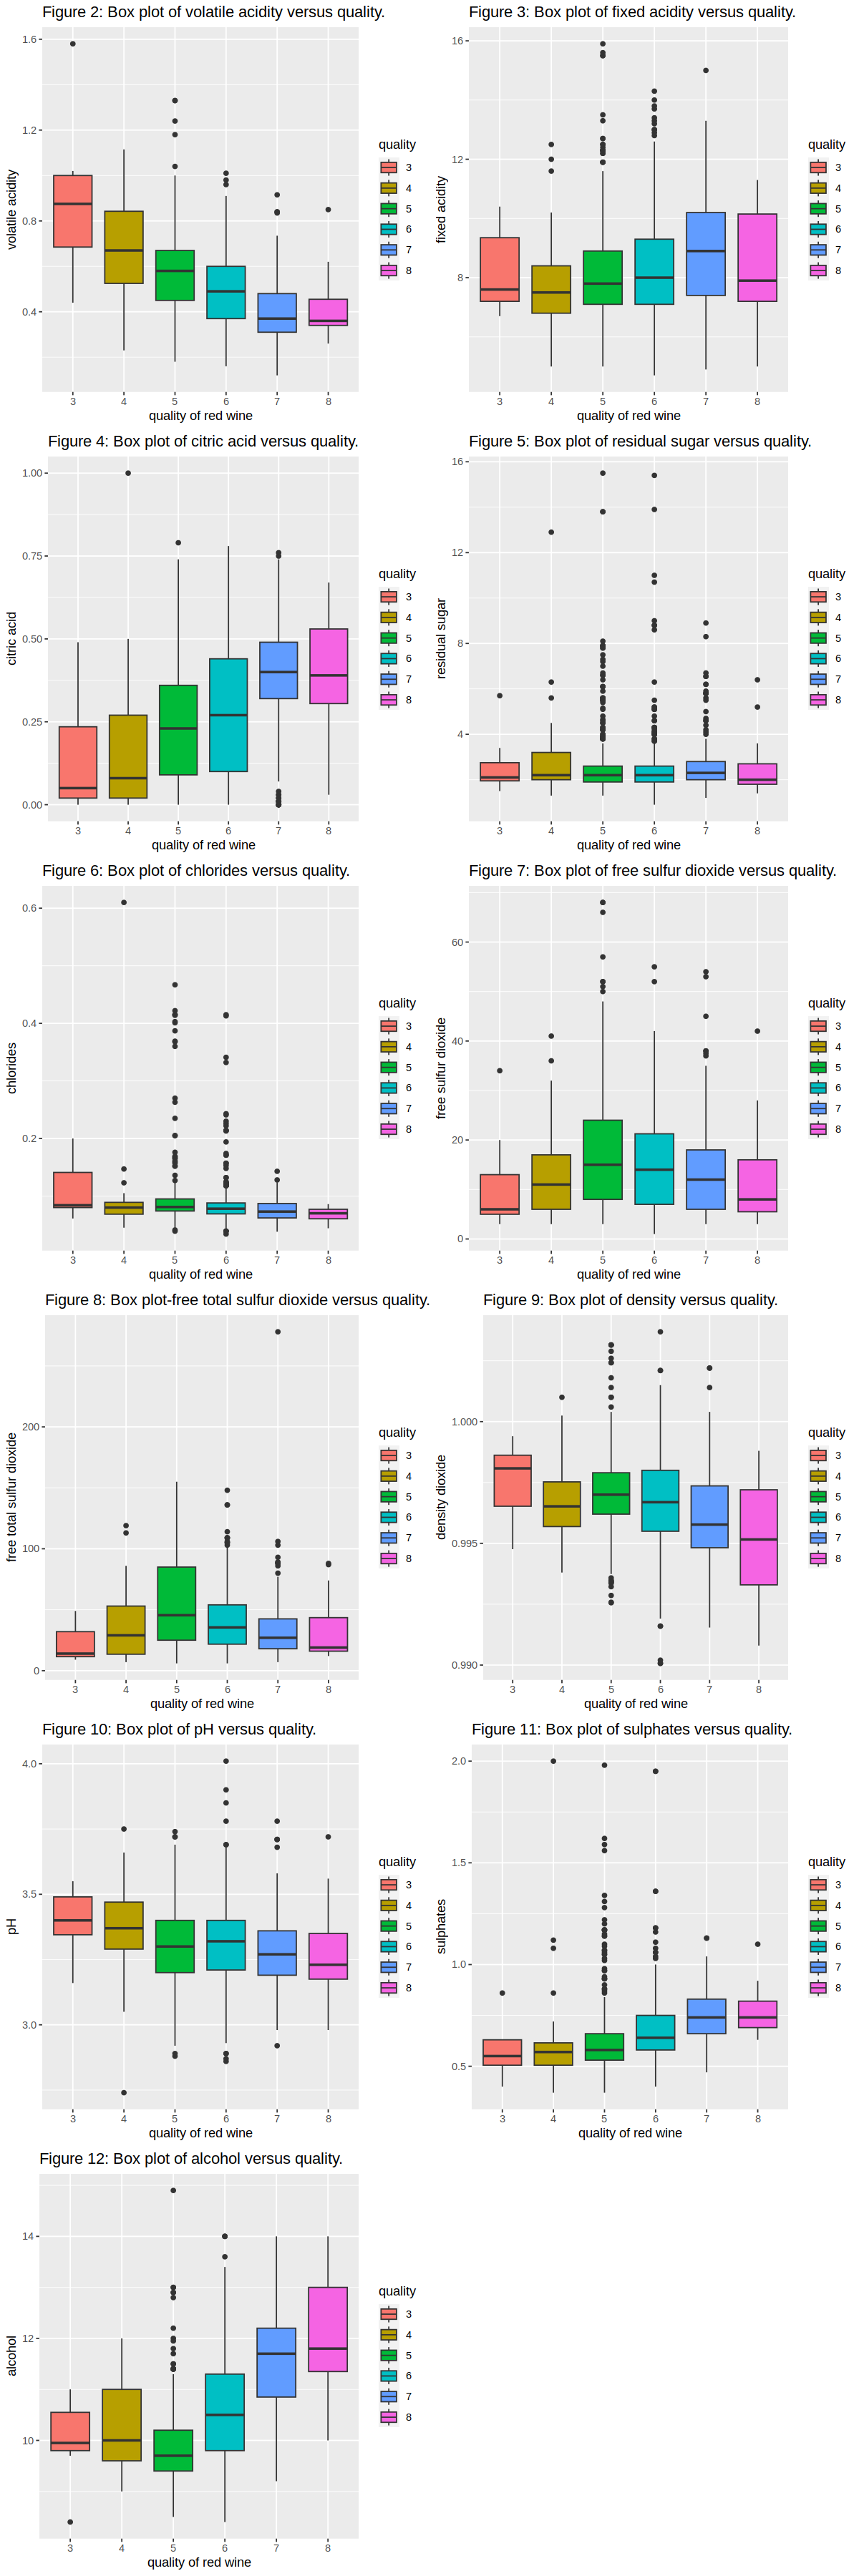

In [20]:
options(repr.plot.width=10, repr.plot.height=30)
plot_grid(plot_volatile_acidity , plot_fixed_acidity,
          plot_citric_acid, plot_residual_sugar, 
          plot_chlorides, plot_free_sulfur_dioxide,
          plot_total_sulfur_dioxide , plot_density,
          plot_pH, plot_sulphates,
          plot_alcohol,ncol = 2)
          

For our exploratory data analysis, we created a box plot visualization for every potential predictor to select roughly a few most influential predictors. Each box plot is created from the training data with the y axis set to whichever predictor you're specifically looking at, it is also important to note that each quality score in a plot is denoted by a different color. 


- For the first box plot, the median for each score quality is significantly different, forming a pattern where the decrease in volatile acidity leads to higher quality score. 
- For the second box plot, the median for each score slightly fluctuates, however they don't show significant difference. 
- For the third box plot, the median for each score is significantly different, creating a pattern where the increase of citric acid leads to the increase of quality score. 
- For the fourth and fifth plot, the median for each is relatively unchanged and looks odd as there are too many outliers. 
- For the six to tenth plot, the median value fluctuates (some has an increasing and other decreasing), however the difference is still not significant. 
- For the eleventh plot, the median for each score is highly different, creating a pattern where the increase in alcohol leads to a higher score despite dipping down at the quality of 5. 


From all plots, it can be concluded that the most influential is citric acid, volatile acidity, and alcohol while other potential predictors might have variation in the median for each plot, those are small in value or not too significant compared to those three. The visualizations for the exploratory data analysis leads us to those three predictors for our final model.

In [21]:
selected_train_based_on_EDA <- wine_train %>%
    select(quality, citric_acid, volatile_acidity, alcohol)

Method:

By the boxplot above, we only use citric_acid, volatile_acidity, alcohol as our predictors. So before we try to do up_sample, we'll select columns and reduce our dataset.

In [22]:
up_sample_train <- recipe(quality ~ ., data= selected_train_based_on_EDA) |>
    step_upsample(quality, over_ratio = 1, skip = FALSE) |>
    prep() |>
    bake(selected_train_based_on_EDA)

head(up_sample_train)

citric_acid volatile_acidity alcohol quality
1 0.42        0.440             9.9    3      
2 0.02        1.020            11.0    3      
3 0.05        0.875            10.2    3      
4 0.49        0.610             8.4    3      
5 0.02        1.020            11.0    3      
6 0.05        0.875            10.2    3

Method:


We use up_sample to solve the problem of unbalanced dataset we have. By the code I wrote, I set every quality to have the same amount of data so that when we doing knn method each quality has the same chance to approach the point in the ideal world.

In [23]:
set.seed(2020)

k_vals <- tibble(neighbors = seq(from = 1, to = 15, by=1))

wine_vfold <- vfold_cv(up_sample_train, v = 5, strata = quality)

wine_recipe <- recipe(quality ~ citric_acid + volatile_acidity + alcohol, 
                        data = up_sample_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(wine_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = wine_vfold, grid=k_vals)

accuracies1 <- knn_fit %>% collect_metrics()


accuracies <- accuracies1 |>
  filter(.metric == "accuracy")

Method:

Because we have randomization here, we need use set.seed. Whenever randomization takes place, set.seed is necessary. We won't repeat explaining the reason of set.seed in the code below. 

We use v_fold to cross-verify the best k between k=1 to k=5. We choice v=5, which means we calculate each k' accuracy 5 times and let the mean value of the accuracy to be the data we use to compare in the following figure 12.

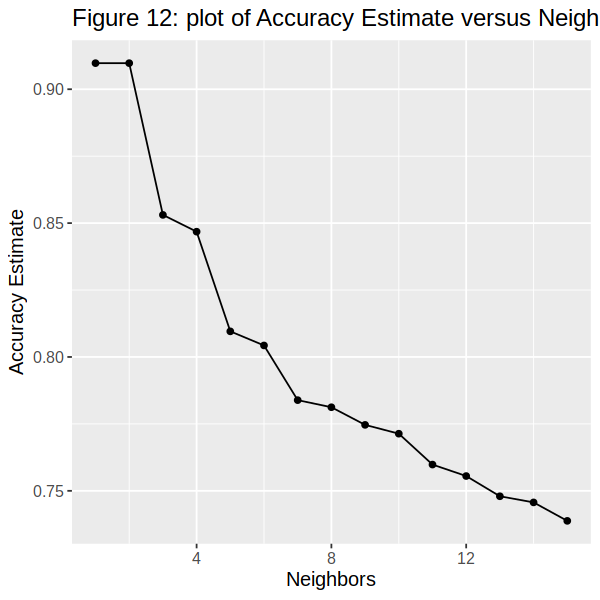

In [24]:
options(repr.plot.width=5, repr.plot.height=5)
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))+
    ggtitle("Figure 12: plot of Accuracy Estimate versus Neighbors.")

accuracy_vs_k

Methods:

Here we plot using our data from using the function tune_grid() setting the x as the neighbors amount that we used and y as the mean tuned for our rsmpe errors. Though the peak is at K = 2, we won't use k as 2. Because this may cause the problem of overfitting. We choose k as 4 to avoid overfitting and we still has high accuracy near 0.85 when k = 4.

In [25]:
set.seed(2020)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 4) |>
       set_engine("kknn") |>
       set_mode("classification")

wine_fit <- workflow() |>
       add_recipe(wine_recipe) |>
       add_model(knn_spec) |>
       fit(data = up_sample_train)
wine_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(4,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1459157
Best kernel: rectangular
Best k: 4

Methods
    
As for now, we create the whole model for doing classification based on 3 predictors and the best k we choice from previous.

In [26]:
set.seed(2020)
wine_test_predictions <- predict(wine_fit , wine_test) |>
       bind_cols(wine_test)

head(wine_test_predictions, n = 5)

.pred_class fixed_acidity volatile_acidity citric_acid residual_sugar
1 5           7.8           0.580            0.02        2.0           
2 5           5.6           0.615            0.00        1.6           
3 5           8.9           0.620            0.19        3.9           
4 7           7.6           0.390            0.31        2.3           
5 5           7.9           0.430            0.21        1.6           
  chlorides free_sulfur_dioxide total_sulfur_dioxide density pH   sulphates
1 0.073      9                   18                  0.9968  3.36 0.57     
2 0.089     16                   59                  0.9943  3.58 0.52     
3 0.170     51                  148                  0.9986  3.17 0.93     
4 0.082     23                   71                  0.9982  3.52 0.65     
5 0.106     10                   37                  0.9966  3.17 0.91     
  alcohol quality
1 9.5     7      
2 9.9     5      
3 9.2     5      
4 9.7     5      
5 9.5     5

Methods:

We fit our model on the test dataset we split at the beginning.

In [27]:
set.seed(2020) 
wine_prediction_accuracy <- wine_test_predictions |>
         metrics(truth = quality, estimate = .pred_class) 
wine_prediction_accuracy


.metric  .estimator .estimate
1 accuracy multiclass 0.5236908
2 kap      multiclass 0.2897390

Here is the accuracy for our model preform on the test dataset. Though we have high accuracy for our knn method, our accuracy for the model to predict is still really low. This is because up_sample only works in the ideal world when each class stays apart from each other. However, for our dataset, we can see from the scatter plot below for true value that different class mixes together. In this case, up_sample may make accuracy worse.

In [28]:
set.seed(2020)
wine_mat <- wine_test_predictions |> 
       conf_mat(truth = quality, estimate = .pred_class)
wine_mat

          Truth
Prediction   3   4   5   6   7   8
         3   0   2   0   1   0   0
         4   0   3  15  13   1   0
         5   3   2 112  48   5   0
         6   0   2  40  67  11   1
         7   0   1   8  29  28   2
         8   0   0   0   4   3   0

- The columns represent the true quality ratings of the wines.
- The rows represent the predicted quality ratings by the model.
- The intersection of rows and columns shows the count of predictions. For instance, wines with a true quality of 3 were never predicted as 3. However, 3 instances of wines with a true quality of 5 were incorrectly predicted as having a quality of 3.
- The main diagonal of the matrix shows the number of correct predictions for each quality class. These values indicate the model's accuracy in predicting each quality rating.


In [29]:
volatile_acidity_vs_citric_acid_prediction <- wine_test_predictions |>
  ggplot(aes(x = volatile_acidity, y = citric_acid, color = .pred_class)) +
  geom_point(alpha = 0.5) +
  labs(color = "quality") + 
  theme(text = element_text(size = 12))+
    ggtitle("Figure 13: Prediction of citric acid versus volatile acidity using predicting data.")

volatile_acidity_vs_citric_acid <- wine_test |>
  ggplot(aes(x = volatile_acidity, y = citric_acid, color = quality)) +
  geom_point(alpha = 0.5) +
  labs(color = "quality") + 
  theme(text = element_text(size = 12))+
    ggtitle("Figure 14: True value of citric acid versus volatile acidity using predicting data.")


volatile_acidity_vs_alcohol_prediction <- wine_test_predictions |>
  ggplot(aes(x = volatile_acidity, y = alcohol, color = .pred_class)) +
  geom_point(alpha = 0.5) +
  labs(color = "quality") + 
  theme(text = element_text(size = 12))+
    ggtitle("Figure 15: Prediction of alcohol versus volatile acidity using predicting data.")

volatile_acidity_vs_alcohol <- wine_test |>
  ggplot(aes(x = volatile_acidity, y = alcohol, color = quality)) +
  geom_point(alpha = 0.5) +
  labs(color = "quality") + 
  theme(text = element_text(size = 12))+
    ggtitle("Figure 16: True value of alcohol versus volatile acidity using predicting data.")

citric_acid_vs_alcohol_prediction <- wine_test_predictions |>
  ggplot(aes(x = citric_acid, y = alcohol, color = .pred_class)) +
  geom_point(alpha = 0.5) +
  labs(color = "quality") + 
  theme(text = element_text(size = 12))+
    ggtitle("Figure 17: Prediction of citric acid versus alcohol using predicting data.")

citric_acid_vs_alcohol <- wine_test |>
  ggplot(aes(x = citric_acid, y = alcohol, color = quality)) +
  geom_point(alpha = 0.5) +
  labs(color = "quality") + 
  theme(text = element_text(size = 12))+
    ggtitle("Figure 18: True value of citric acid versus alcohol using predicting data.")


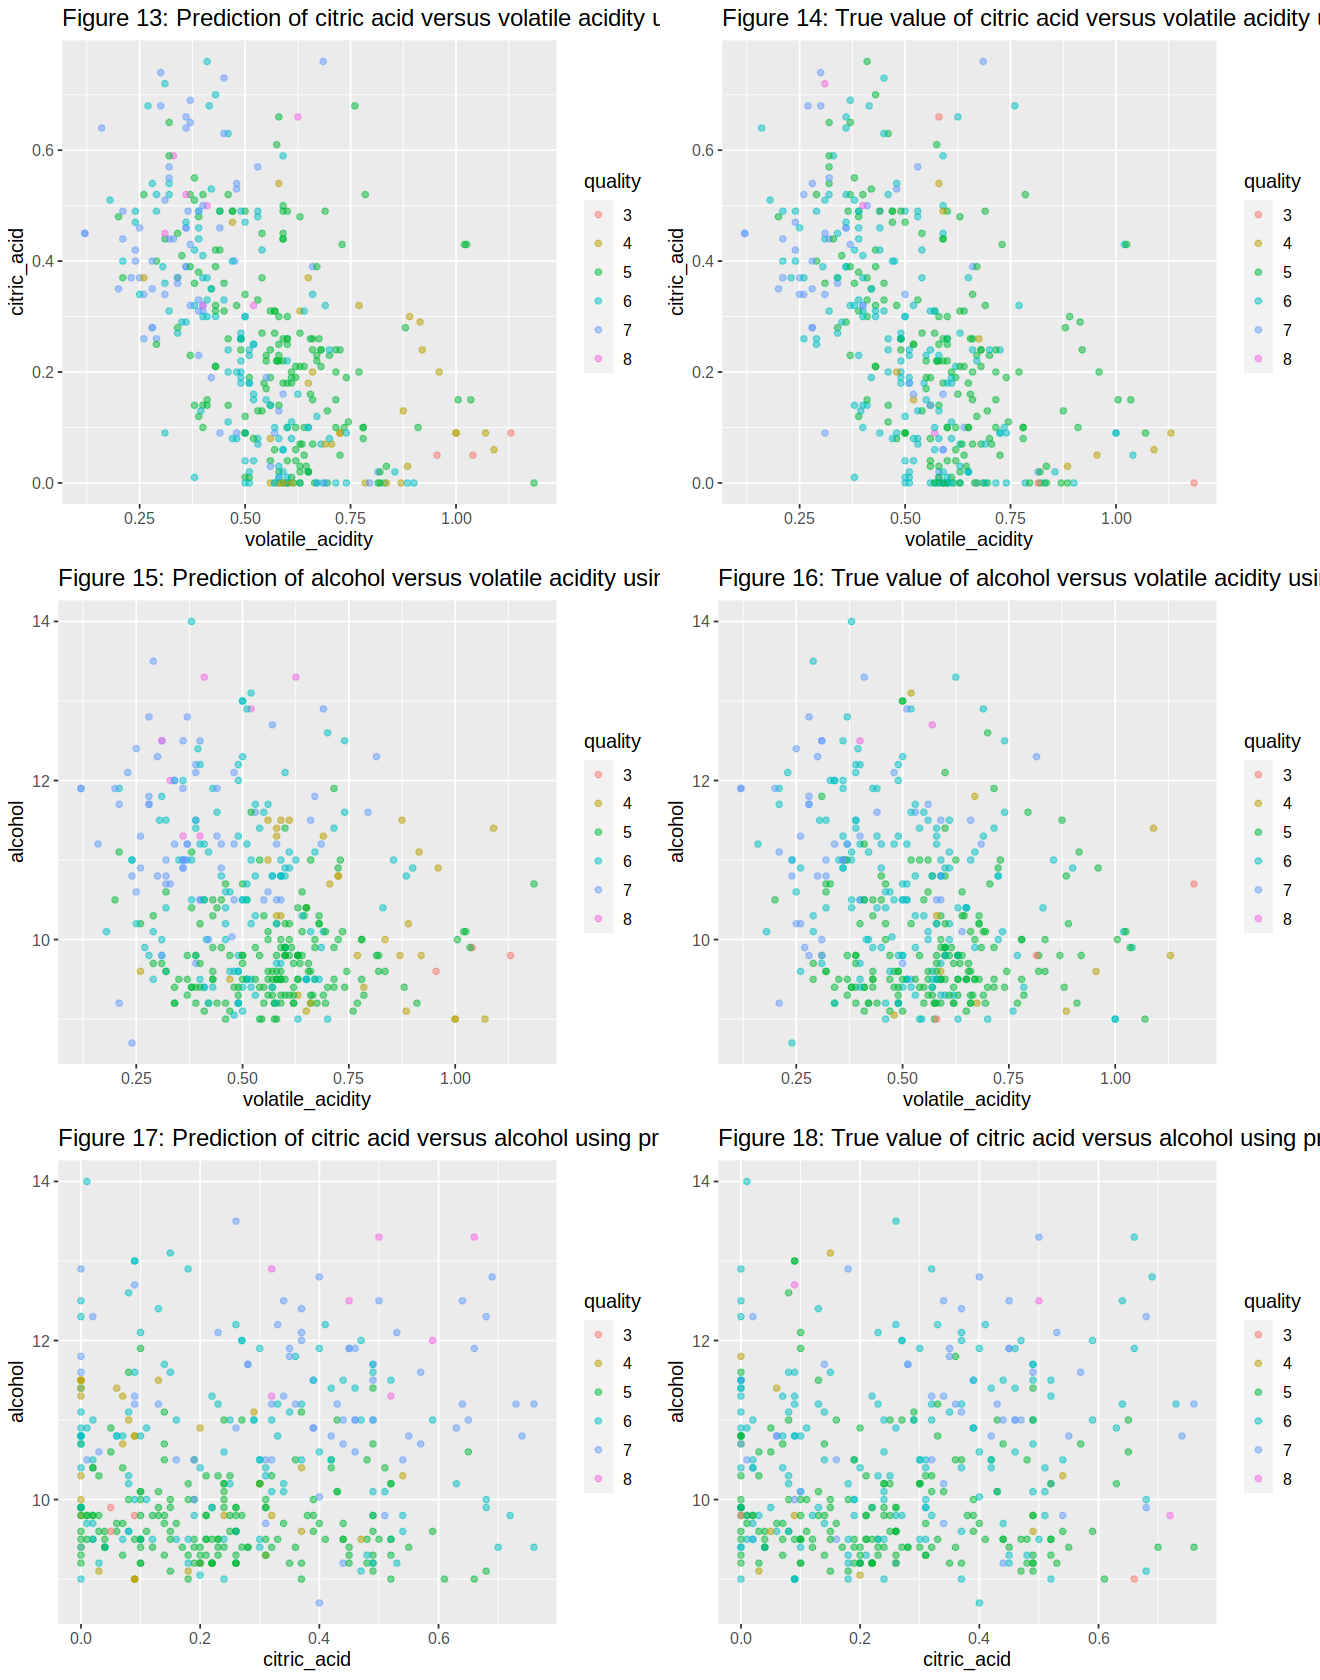

In [30]:
options(repr.plot.width=11, repr.plot.height=14)
plot_grid(volatile_acidity_vs_citric_acid_prediction , volatile_acidity_vs_citric_acid, 
          volatile_acidity_vs_alcohol_prediction , volatile_acidity_vs_alcohol,
          citric_acid_vs_alcohol_prediction, citric_acid_vs_alcohol,
          ncol = 2)

The scatterplots compare the test data set we split out from our initial data set and the prediction we made based on the our observation and training the model. We can obverse from the plot that the left graphs of prediction and the right graphs of the true value have very great difference in color of points. This tells us that our accuracy is not high, which can also be seen directly from our rate of accuracy.

### Discussion

#### Impact
In the wine industry, wine-makers would ideally give more attention to three predictors being citric acid, volatile acidity, and alcohol. This could mean depending on the wine quality desired, they could control the levels of these three predictors as they play the most significant role. This could also be crucial help for scientists as they would understand that certain chemicals in wine-making play a bigger role than others when trying to make a wine of specific quality. The model might not be completely accurate in terms of giving the relationship between the predictors and wine quality but it would serve as a reference or guiding tool to pay attention more to those three predictors.


#### Future Questions:
The type of wine used in this entire report is red wine, so several questions would be:
1. What predictors affect other types of wine?
2. Would the same three predictors be the most crucial part in determining wine quality for other types of wine?
More broader questions would be:
1. Does the higher red wine quality lead to more purchases?
2. Red wine has been deemed by society as a good red wine if it has a higher alcohol level, could a red wine have higher quality but low alcohol level?


### Reference 

Cortez, P., Cerdeira, A., Almeida, F., Matos, T., and Reis, J.. (2009). Wine Quality. UCI Machine Learning Repository. doi.org/10.24432/C56S3T


Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Modeling wine preferences by data mining from physicochemical properties. Decision Support Systems, 47(4), 547–553. doi.org/10.1016/j.dss.2009.05.016


CVRVV. (n.d.). About Vinho Verde. Vinho Verde. www.vinhoverde.pt/en/about-vinho-verde


Er, Y., & Atasoy, A. (2016). The Classification of White Wine and Red Wine According to Their Physicochemical Qualities. International Journal of Intelligent Systems and Applications in Engineering, 4(Special Issue-1), 23-26. doi.org/10.18201/ijisae.265954 
